_Lizenz: Das folgende Lehrmaterial kann unter einer [CC-BY-SA 4.0](https://creativecommons.org/licenses/by/4.0/legalcode) Lizenz frei verwendet, verbreitet und modifiziert werden._   
 _Authoren: Jana Lasser (jana.lasser@ds.mpg.de)_  
 _Das Lehrmaterial wurde im Zuge des Projektes "Daten Lesen Lernen", gefördert vom Stifterverband und der Heinz Nixdorf Stiftung erstellt._

# Übung 05 - Allgemein: Daten einlesen, bereinigen und mit Histogrammen visualisieren
### Praktische Hinweise
$\rightarrow$ Übungen sind dafür gedacht, dass ihr sie euch daheim anseht und versucht, ein paar Aufgaben selbst zu lösen. In den Tutorien könnt ihr euch weiter mit dem Lösungen der Aufgaben beschäftigen und dabei Hilfe von den Tutor*innen bekommen.  

$\rightarrow$ Wenn ein Fehler auftritt:
1. Fehlermeldung _lesen_ und _verstehen_
2. Versuchen, selbst eine Lösung zu finden ($\rightarrow$ hier findet das Lernen statt!)
3. Das Problem googlen (Stichwort: Stackoverflow) oder den/die Nachbar*in fragen
4. Tutor*in fragen

$\rightarrow$ Unter <font color='green'>**HINWEIS**</font> werden Hinweise gegeben, die für die Lösung der Aufgabe hilfreich sind und oftmals auch weiterführende Informationen zur Aufgabe liefern.

$\rightarrow$ Mit **(Optional)** gekennzeichnete Übungsteile sind für besonders schnelle Menschen :-).

<a name="top"></a>Inhalt
---
In der nachfolgenden Fallstudie werden wir mehrere Datensätze mit Tweets untersuchen. Dabei vergleichen wir Tweets von "normalen" Twitter-Nutzern mit Tweets von Donald Trum und Tweets von russischen Trollen.

Als Datenquellen verwenden wir öffentlich zugängliche Datensätze von Tweets:
* ["normale" Twitter-User](http://help.sentiment140.com/for-students/)
* [Donald Trump](https://github.com/mkearney/trumptweets)
* [russische Trolle](https://github.com/fivethirtyeight/russian-troll-tweets/)

Für die folgenden Übungen gibt es kein Lehrvideo. Deswegen wird es in den Jupyter-Notebooks zu den Übungen mehr Erklärungen und Zwischenschritte geben. Darüber hinaus haben ab dieser Woche auch nicht mehr alle Übungen der verschiedenen Übungsgruppen den exakt gleichen Inhalt, da einige Themenbereiche etwas unterschiedliche Werkzeuge brauchen als andere. Das Konzept ist aber überall das gleiche.  

Die aktuelle Übung gliedert sich in drei Teile:

* [Daten beschaffen](#daten_beschaffen)
* [Daten erkunden](#daten_erkunden)
* [Daten bereinigen](#daten_bereinigen)
* [Histogramme](#histogramme)

<a name="daten_beschaffen"></a>1. Daten beschaffen
---
**A.** Mache dich mit den Datenquellen vertraut: Wer hat die Daten gesammelt und in welchem Kontext publiziert?   
**B.** Laden der Daten: Den Datensatz der "normalen" User müssen wir erst herunterladen, entpacken und können ihn dann als Pandas DataFrame laden:
* gehe auf die Seite http://help.sentiment140.com/for-students/
* lade das Archiv ```trainingtestdata``` mit dem Datensatz herunter
* entpacke das Archiv
* lies die Datei ```training.1600000.processed.noemoticon.csv``` wie folgt ein:  

In [5]:
# zum Speichern von Tabellen
import pandas as pd 

# unter diesem Pfad sollte der Datensatz gespeichert sein
pfad_normal = 'daten/training.1600000.processed.noemoticon.csv'
tweets_normal_raw = pd.read_csv(pfad_normal, encoding="ISO-8859-1")
tweets_normal_raw.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


**HINWEIS:** durch das Argument ```encoding``` geben wir explizit an, welchen Standard für die Zeichenkodierung des Textes Pandas verwenden soll, um den Text in dem Datensatz zu interpretieren. Das ist insbesondre wichtig, da Tweets sehr viele Sonderzeichen enthalten können, die nicht im normalen Alphabet abgebildet sind.  
Der hier verwendete Standard [ISO 8859-1](https://de.wikipedia.org/wiki/ISO_8859-1) ermöglicht es, den Tweet-Datensatz ohne Fehler einzulesen. Würden wir das encoding nicht explizit angeben, würde Pandas per Default [UTF-8](https://de.wikipedia.org/wiki/UTF-8) verwenden und einen ```UnicodeDecodeError``` produzieren.  

Beim Einlesen fällt auf, dass der Datensatz keinen "Header" (also eine Kopfzeile mit den Namen der Spalten) enthält. Pandas verwendet automatisch die erste Zeile als Header, was in diesem Fall zu einem Falschen Ergebnis führt, da die erste Zeile bereits Daten enthält. Das können wir umgehen, indem wir beim Laden der Daten einen Header explizit angeben:

In [6]:
tweets_normal_raw = pd.read_csv(pfad_normal, \
                            names=['sentiment','ID','Date','Query','User','Tweet'],\
                            encoding="ISO-8859-1")
tweets_normal_raw.head()

,sentiment,ID,Date,Query,User,Tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


Die verschiedenen Argumente, um die Funktionsweise der Funktion ```read_csv()``` von Pandas zu modifizieren finden sich in der [Dokumentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) der Funktion. Falls eine Funktion nicht direkt das tut, was du erwartest, ist es oftmals eine gute Idee, als ersten Schritt in der Dokumentation nachzusehen.  

Die anderen beiden Datensätze können wir direkt aus dem Internet herunterladen:

In [7]:
# Bibliotheken zum Laden von Daten aus dem Internet
import requests 
import io

# die URL unter der der Trump-Tweet-Datensatz zu finden ist
url_trump = "https://github.com/mkearney/trumptweets/raw/master/data/trumptweets-1515775693.tweets.csv"

# lies die Information von der in der URL hinterlegten Website aus
# diesmal geben wir das encoding schon an dieser Stelle an
antwort_trump = requests.get(url_trump).content
inhalt_trump = io.StringIO(antwort_trump.decode('ISO-8859-1'))

# lade die Daten in ein DataFrame und zeige die ersten paar Zeilen an
tweets_trump_raw = pd.read_csv(inhalt_trump)
tweets_trump_raw.head()

/home/jlasser/virtualenvs/p3.5_venv/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (15,30,31,32,36,37,38,42,43,44,45,46,47,50,51,52,56,57,58,59,60,61,62,63,64,65,66,67) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,status_id,created_at,user_id,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,...,retweet_verified,place_url,place_name,place_full_name,place_type,country,country_code,geo_coords,coords_coords,bbox_coords
0,x1864367186,2009-05-20 22:29:47,x25073877,realDonaldTrump,Read a great interview with Donald Trump that ...,Twitter Web Client,112,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,x9273573134835712,2010-11-29 15:52:46,x25073877,realDonaldTrump,Congratulations to Evan Lysacek for being nomi...,Twitter Web Client,127,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,x29014512646,2010-10-28 18:53:40,x25073877,realDonaldTrump,I was on The View this morning. We talked abou...,Twitter Web Client,139,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,x7483813542232064,2010-11-24 17:20:54,x25073877,realDonaldTrump,Tomorrow night's episode of The Apprentice del...,Twitter Web Client,140,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,x5775731054,2009-11-16 21:06:10,x25073877,realDonaldTrump,Donald Trump Partners with TV1 on New Reality ...,Twitter Web Client,116,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# die URL unter der der Troll-Tweet-Datensatz zu finden ist
url_troll = 'https://github.com/fivethirtyeight/russian-troll-tweets/raw/master/IRAhandle_tweets_1.csv'

# lies die Information von der in der URL hinterlegten Website aus
# auch hier geben wir das encoding schon an dieser Stelle an
antwort_troll = requests.get(url_troll).content
inhalt_troll = io.StringIO(antwort_troll.decode('ISO-8859-1'))

# lade die Daten in ein DataFrame und zeige die ersten paar Zeilen an
tweets_troll_raw = pd.read_csv(inhalt_troll)
tweets_troll_raw.head()

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,...,account_type,retweet,account_category,new_june_2018,alt_external_id,tweet_id,article_url,tco1_step1,tco2_step1,tco3_step1
0,906000000000000000,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,10/1/2017 19:58,10/1/2017 19:59,1052,9636,253,...,Right,0,RightTroll,0,905874659358453760,914580356430536707,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/914580356430...,NaN,NaN
1,906000000000000000,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,10/1/2017 22:43,10/1/2017 22:43,1054,9637,254,...,Right,0,RightTroll,0,905874659358453760,914621840496189440,http://twitter.com/905874659358453760/statuses...,https://twitter.com/damienwoody/status/9145685...,NaN,NaN
2,906000000000000000,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,Unknown,English,10/1/2017 22:50,10/1/2017 22:51,1054,9637,255,...,Right,1,RightTroll,0,905874659358453760,914623490375979008,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/913231923715...,NaN,NaN
3,906000000000000000,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,English,10/1/2017 23:52,10/1/2017 23:52,1062,9642,256,...,Right,0,RightTroll,0,905874659358453760,914639143690555392,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/914639143690...,NaN,NaN
4,906000000000000000,10_GOP,"19,000 RESPECTING our National Anthem! #StandF...",Unknown,English,10/1/2017 2:13,10/1/2017 2:13,1050,9645,246,...,Right,1,RightTroll,0,905874659358453760,914312219952861184,http://twitter.com/905874659358453760/statuses...,https://twitter.com/realDonaldTrump/status/914...,NaN,NaN


[Anfang](#top)

<a name="daten_erkunden"></a>2. Daten erkunden
---
Zu Beginn möchten wir ein paar grundlegende Dinge über den Datensatz herausfinden: z.B. die enthaltene Information, die Anzahl der Tweets in jedem der Datensätze und die Anzahl der User.  
Die Namen der Spalten eines DataFrame lassen sich über die Variable ```columns``` des DataFrames ansehen:

In [ ]:
# eine Liste der im DataFrame "tweets_troll_raw" enthaltenen Spalten
tweets_troll_raw.columns

In einem DataFrame können wir auf eine bestimmte Spalte mit ihrem Namen zugreifen:

In [ ]:
# zeigt die Spalte mit dem Namen "author" im DataFrame 
# "tweets_troll_raw" an
tweets_troll_raw.author

Mit der Funktion ```unique()``` lassen sich die einzigartigen Einträge in einer Spalte herausfinden:

In [9]:
# eine Liste der User-Namen, wobei jeder User genau einmal
# vorkommt
tweets_troll_raw.author.unique()

array(['10_GOP', '1488REASONS', '1D_NICOLE_', '1ERIK_LEE', '1LORENAFAVA1',
       '2NDHALFONION', '459JISALGE', '4EVER1937', '4EVER_SUSAN',
       '4MYSQUAD', '5EMEN5EMENICH', '5L5_5L5', '666STEVEROGERS', '6DRUZ',
       '71BILALJAMIL1', 'AAASSSSSHHH', 'AAATEST1234', 'AAAVADAKEDAVRAA',
       'AAGN1AA', 'AANTIRACIST', 'AARONALLENALL', 'AARON_M1TCHELL',
       'ABALAKOVAYLIA', 'ABBASSHUKRI', 'ABBYLOPTRT', 'ABELLABAB',
       'ABIGAILCALLME', 'ABIGAILSSILK', 'ABIISSROSB', 'ABISADMASST',
       'ABMERRLINS', 'ABOUTPOLIT', 'ABRAMSREBEKAH', 'ABUNUWASA',
       'ABU_UBAIDA2', 'ACAB_ZONE', 'ACAPARELLA', 'ACEJINEV',
       'ACHSAHORKHAN', 'ACTIVEMIKR', 'ADALESTRTM', 'ADAMCHAPMANJR',
       'ADAMMA_DEFOND', 'ADAM_MATHISSS', 'ADDIE_HOL', 'ADELE_BROCK',
       'ADELIINESTRT', 'ADELINE_GS', 'ADELISTRTT', 'ADKEZLATE',
       'ADLEESTTT', 'ADLEESWOD', 'ADNNELSTR', 'ADRGREERR', 'ADRIANAMFTTT',
       'ADRIASNSS', 'ADRIENNE_GG', 'ADRI_LOW_R', 'AESPARZZA', 'AFEELIUTR',
       'AFIFYAMIRA1', 'AFONIA_ZHI

In [ ]:
print('Anzahl Troll Tweets: {}'.format(len(tweets_troll_raw)))
unique_users = len(tweets_troll_raw.author.unique())
print('Anzahl Troll User: {}'.format(unique_users))

### Aufgaben
**A.** Wie heißen die Spalten in den drei Datensätzen und welche Informationen enthalten sie?  
**B.** Sieh dir ein paar Tweets aus den jeweiligen Datensätzen an, indem du auf die Spalte mit dem Tweet-Text und den Index des Tweets zugreifst.  
**C.** Wieviele Tweets und User enthält der Datensatz mit "normalen" Tweets, wieviele der Datensatz zu den Trump Tweets?  
**D.** Was ist die mittlere Anzahl an Tweets je User für den Datensatz mit den normalen Usern und den mit den Trollen?  
**E.** **(Optional):** Welcher User im Troll-Datensatz hat die meisten Tweets produziert und wieviele Tweets sind das?  
**F.** **(Optional):** der Troll-Datensatz listet auch die Tweet-Sprache. Wieviele Sprachen sind im Datensatz vertreten und wieviele Tweets gibt es je Sprache?

[Anfang](#top)

<a name="daten_bereinigen"></a>3. Daten bereinigen
---
Offensichtlich gibt es im Datensatz der Trump-Tweets nicht nur Tweets von Trump selbst [@realDonaldTrump](https://twitter.com/realdonaldtrump) sondern auch noch von vier anderen Usern. Im Folgenden wollen wir die Datensätze etwas aufräumen, um sie leichter nutzbar zu machen.

In [ ]:
# originale Anzahl Tweets
print('Anzahl der Tweets vor Bereinigung: {}'.format(len(tweets_trump_raw)))

# entferne alle Tweets von Usern, die nicht "realDonaldTrump"
# sind aus dem Datensatz.
mask_realDonald = tweets_trump_raw['screen_name'] == 'realDonaldTrump'
tweets_trump_filtered = tweets_trump_raw[mask_realDonald]

# wir sehen: es sind gar nicht so viele Tweets verschwunden.
print('Anzahl der Tweets nach Bereinigung: {}'.format(len(tweets_trump_filtered)))

Es fällt auf, dass die Spalten in den drei Datensätzen unterschiedlich heißen. Die Spalte mit dem User, der einen Tweet erstellt hat, heißt z.B. ```User``` (normale Tweets), ```screen_name``` (Trump Tweets) und ```author``` (Troll Tweets), obwohl sie die gleiche Information - nämlich den Username - enthält. Um die Daten in Zukunft einfacher handhaben zu können, wollen wir sicherstellen, dass alle Spalten in allen Datensätzen gleich heißen. Außerdem löschen wir alle Spalten mit Informationen, die nicht relevant für uns sind. Dafür erstellen wir basierend auf den DataFrame mit den (gefilterten) Rohdaten ein neues DataFrame, das nur die Spalten (mit den richtigen Namen) enthält, die wir brauchen:

In [ ]:
# neues, gesäubertes DataFrame
tweets_trump = pd.DataFrame({'Date':tweets_trump_filtered['created_at'],\
                             'User':tweets_trump_filtered['screen_name'],\
                             'Tweet':tweets_trump_filtered['text']})

### Aufgaben
Generell interessieren wir uns für die Spalten, in denen der Username, das Tweet-Datum und der Tweet-Text enthalten sind. Bei den Troll Tweets möchten wir außerdem die Spalten mit Informationen über die Sprache, die Anzahl der Follower und die Anzahl der gefolgten Accounts.  

**A.** Bereinige auch die Tweets von den normalen Usern, indem du ein neues DataFrame mit den Spalten ```[Date, User, Text]``` basierend auf den Rohdaten erstellst.  
**B.** Bereinige die Troll Twees (wie oben die Trump Tweets), behalte zusätzlich auch die Spalten, die die Informationen über die Tweet-Sprache, die Anzahl der Follower und die Anzahl der gefolgten Accounts enthalten.  
**C. (Optional):** Aktuell benutzen wir nur den ersten von 13 Teilen des Troll-Tweet Datensatzes. Wir machen das, da sonst der Datensatz eventuell zu groß werden würde. Wenn du möchtest, kannst du aber auch die anderen 12 Datensätze herunterladen und mit dem ersten zu einem einzigen großen Datensatz zusammenfügen. <font color='green'>**HINWEIS:** Benutze dazu am besten die ```concat()``` Funktion von Pandas ([Dokumentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html)). </font> Wie sind die Tweets in dem gesamten Datensatz strukturiert? Wie wurde der Datensatz in einzelne Teile aufgeteilt?   
**D. (Optional):** Das Format der Spalte "Date" ist noch in allen drei Datensätzen unterschiedlich. Versuche, alle drei unterschiedlichen Zeit- und Datumsangaben in einen String mit dem Format ```YYYY-MM-DD hh:mm:ss``` (Year-Month-Day hour:minute:second) zu überführen. Noch eleganter ist die Benutzung eines [datetime](https://docs.python.org/2/library/datetime.html) Objektes, um Datum und Uhrzeit zu speichern. 

Im Folgenden interessieren wir uns für die Länge der einzelnen Tweets. Diese können wir berechnen und in den DataFrames speichern:

In [ ]:
length = []
for tweet in tweets_trump['Tweet']:
    length.append(len(tweet))

tweets_trump['Length'] = length
tweets_trump.head()

**E.** Erstelle eine Funktion, die für ein gegebenes DataFrame die Tweet-Länge berechnet und eine neue Spalte mit der Tweet-Länge zum DataFrame hinzufügt. Wende diese Funktion auf alle drei Tweet-Datensätze an.  
**F.** **(Optional)** Erstelle eine zweite Funktion, die die Anzahl der Worte je Tweet berechnet und ebenfalls als zusätzliche Spalte dem DataFrame hinzufügt.  
**G.** Speichere alle drei Dataframes als ```.csv``` Datei, indem du die Funktion [to_csv()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html) des Dataframes benutzt.

[Anfang](#top)

<a name="histogramme"></a>4. Histogramme
---
Im folgenden Abschnitt werden wir damit beginnen, die gewonnenen Informationen zu visualisieren. Eine sehr einfache Visualisierung ist das Histogramm, eine graphische Darstellung der Häufigkeit eines Merkmals. Zur Illustration erstellen wir eine kleine Visualisierung der Verteilung von Werten in einer Liste:

In [11]:
# eine Liste mit 30 Ganzzahlen, die z.B. das Alter von Personen in einer
# Gruppe darstellen können
alter = [37, 20, 84,  2, 11, 89, 52, 65, 90, 21, 30, 12, 17, 53, 62, 45, 37,
        3,  6, 64, 85,  6, 95, 73, 68, 55, 86, 83, 91,  1]

# für Visualisierungen benutzen wir die Blbiothek "matplotlib.pyplot"
import matplotlib.pyplot as plt

# Histogramme lassen sich einfach mit der Funktion plt.hist() erstellen
plt.hist(alter);

Visualisierungen sollten immer mit Achsenbeschriftungen versehen werden. Dafür verwenden wir die Funktionen ```plt.xlabel()``` und ```plt.ylabel```. Außerdem können wir der Abbildung mit ```plt.title()``` einen Titel geben. Mit verschiedenen optionalen Argumenten lässt sich das Verhalten von ```plt.hist()``` anpassen:
* ```bins``` ändert die Anzahl der Bins
* ```range``` ändert den dargestellten Bereich auf der x-Achse
* ```rwidth``` ändert die dargestellte bin-Weite 
* ```color``` ändert die Farbe
* ```alpha``` ändert den Alpha-Wert (Durchsichtigkeit) der dargestellten Balken.

Plot-Funktionen haben oftmals sehr viele optionale Argumente (auch "keyword arguments" genannt). Um herauszufinden, wass die jeweiligen Funktionen alles können, lohnt sich ein Blick in die [Dokumentation](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html). Außerdem sollte jede Darstellung *immer* mit Achsenbeschriftungen und eventuell einem Titel versehen werden:

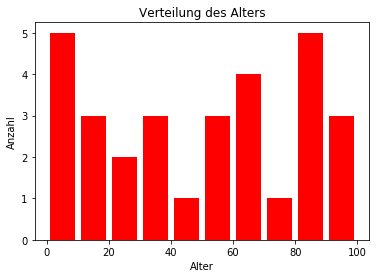

In [13]:
plt.hist(alter, color='red', rwidth=0.8, range=[0,100], bins=10, label='alter')
plt.xlabel('Alter')
plt.ylabel('Anzahl')
plt.title('Verteilung des Alters');

### Aufgaben
**A.** Erstelle ein Histogramm der Follower der Troll-Accounts.  
**B.** Mache dich mit den unterschiedlichen Argumenten der Funktion ```plt.hist()``` vertraut, indem du verschiedene Werte und Kombinationen für die Daten ausprobierst. Finde Werte, die die Daten deiner Meinung nach gut und verständlich darstellen. Worauf kommt es dabei an? Versieh die Darstellung mit passenden Beschriftungen.  
**C.** Insbesondere das Argument ```bins``` verändert die Darstellung des Histogrammes sehr stark. Was kann schiefgehen, wenn ```bins``` zu niedrig oder zu hoch gewählt wird? Was ist eine gute Wahl für einen Datensatz?  
**D.** Visualisiere die Anzahl der gefolgten Accounts (```'Following'```) im selben Histogram. Was für Aussagen über die Troll-Accounts kannst du aus dieser Visualisierung ableiten? <font color='green'>**HINWEIS:** Du kannst einfach in der selben Code-Zelle zwei mal hintereinander die Funktion ```plt.hist()``` (natürlich mit unterschiedlichen Daten) aufrufen, um die Daten übereinandergelegt darzustellen. Du kannst mit der Funktion ```plt.legend()``` eine Legende zur Abbildung hinzufügen. Damit das funktioniert, musst du den einzelen plot-Befehlen vorher ein entsprechendes ```label``` Argument mitgeben.</font> Was fällt dir auf? Worauf musst du achten, damit die beiden Histogramme vergleichbar sind?  
**E. (Optional)** Was hat es mit den beiden keyword arguments ```density``` und ```cumulative``` auf sich? Wie verändert sich das Histogram und wie kann die Darstellung dann interpretiert werden?

[Anfang](#top)